In [1]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp
import jax.numpy.linalg as JLA

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange
from functools import partial

In [4]:
n = 32
num_itr = 20
K = 100
max_inner = 50
train_depth = 20
adam_lr = 0.01
M = 0.05 * jnp.array(np.random.randn(n, n))
P = 0.15 * jnp.eye(len(M)) + M.T @ M

In [7]:
def get_x_sol(q):
    return JLA.inv(P) @ q
batch_get_x_sol = jax.jit(jax.vmap(get_x_sol, in_axes=-1, out_axes=-1))

In [13]:
def Jacobi_itr(max_itr, q):
    x = jnp.zeros((n, K))
    D = jnp.diag(P.diagonal())
    Dinv = JLA.inv(D)
    A = -Dinv @ (P - D)
    b = Dinv @ q
    for i in range(max_itr):
        x = A @ x + b
    return x

In [14]:
@jax.jit
def get_dot(x):
    return x @ x.T
batch_get_dot = jax.vmap(get_dot, in_axes=-1, out_axes=-1)

In [15]:
def comp_mse(max_itr):
    se = 0.0
    q = jnp.array(np.random.randn(n, K))
    x_sol = batch_get_x_sol(q)
    x_hat = Jacobi_itr(max_itr, q)
    return jnp.sum(batch_get_dot(x_hat - x_sol))/K

In [16]:
Jacobi_mse = [comp_mse(i+1) for i in range(num_itr)]

In [17]:
df = pd.DataFrame()
df["Iteration"] = range(num_itr)
df["Jacobi method"] = np.array(Jacobi_mse)

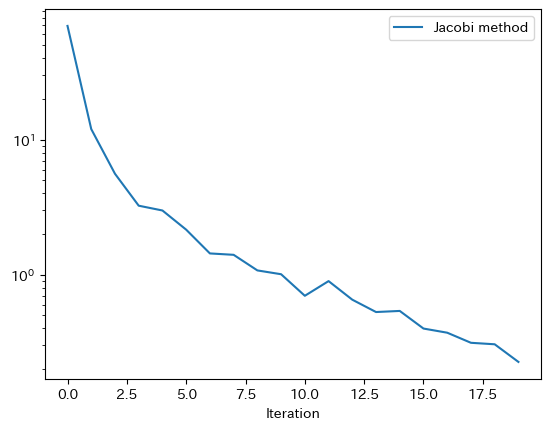

In [19]:
df.plot(x = df.columns[0], y = df.columns[1])
plt.yscale("log")